In [77]:
import pandas as pd
import numpy as np

# Load in data
## Sector Breakdown Codes
#### DE Related Breakdown Codes
- B7 - Machine SW tooling
- B7 - Procedure issue​
- B7 - Queue definition NOK​
- B7 - Sequence issue​
- B8 - Design (HW/SW)​

#### TF Related Breakdown Codes
- B0 - Undefined​
- B3 - Giving training​
- B3 - Logging redundant or unnecessary​
- B3 - Material damaged contaminated lost​
- B3 - No manpower​
- B3 - Procedure / process is not followed​
- B3 - Skills / training needed​
- B4 - Availability Toolcabin​
- B4 - Defect/Incompl/Calibrate Toolcabin​
- B4 - Tool Contaminated Toolcabin​
- B4 - Tooling Own Workcenter​
- B5 - Facility​
- B6 - MMT Support software tooling​
- B9 - Process Lab​

#### Supply Chain Breakdown Codes
- B1 – Material Availability​

In [78]:
cabin_data = pd.read_csv("./NXT Wet Platform DN&AIR - Tiered Ownership.csv")
SF_dict = {
    'SF-01': ['FC-024', 'FC-025', 'FC-026', 'FC-027', 'FC-040', 'FC-056'],
    'SF-02': ['FC-021', 'FC-022', 'FC-023', 'FC-041'],
    'SF-03': ['FC-019', 'FC-020', 'FC-033'],
    'SF-04': ['FC-014', 'FC-057'],
    'SF-05': ['FC-001'], 
    'SF-06': ['FC-002'], 
    'SF-07': ['FC-003', 'FC-048', 'FC-050'],
    'SF-08': ['FC-004'],
    'SF-09': ['FC-031'],
    'SF-10': ['FC-009', 'FC-010', 'FC-011', 'FC-012', 'FC-015', 'FC-038', 'FC-086'],
    'SF-11': ['FC-059', 'FC-061', 'FC-062', 'FC-063', 'FC-064', 'FC-065'],
    'SF-12': ['FC-006', 'FC-008'], 
    'SF-13': ['FC-005', 'FC-007', 'FC-044', 'FC-054'],
    'SF-14': ['FC-028', 'FC-029', 'FC-042', 'FC-060'],
    'SF-21': ['FC-032'],
    'SF-83': ['FC-085', 'FC-227', 'FC-228', 'FC-229'],
    'SF-84': ['FC-221', 'FC-217', 'FC-218'],
    'SI-00': ['IC-011', 'IC-101', 'IC-102', 'IC-103'],
    'SI-01': ['IC-001', 'IC-002', 'IC-003', 'IC-004', 'IC-005', 'IC-015', 'IC-031', 'IC-034', 'IC-037', 'IC-104'],
    'SI-02': ['IC-008', 'IC-009', 'IC-010', 'IC-016', 'IC-017', 'SCI-108', 'SCI-109', 'SCI-110', 'SCI-116'], 
    'SI-03': ['IC-006', 'IC-007', 'IC-013', 'IC-018', 'IC-019', 'SCI-106', 'SCI-107', 'SCI-118']}

sector_breakdowns_dict = {
    'DE Breakdown': [
        'B7 - Machine SW tooling (see comment)', 
        'B7 - Procedure issue', 
        'B7 - Queue definition NOK', 
        'B7 - Sequence issue', 
        'B8 - Design (HW/SW)'
        ],

    'TF Breakdown': [
        'B0 - Undefined', 
        'B3 - Giving training',
        'B3 - Logging redundant or unnecessary',
        'B3 - Material damaged contaminated lost',
        'B3 - No manpower',
        'B3 - Procedure / process is not followed',
        'B3 - Skills / training needed',
        'B4 - Availability Toolcabin',
        'B4 - Defect/Incompl/Calibrate Toolcabin',
        'B4 - Tool Contaminated Toolcabin',
        'B4 - Tooling Own Workcenter',
        'B5 - Facility',
        'B6 - MMT Support software tooling',
        'B9 - Process Lab'
        ],

    'Supply Chain Breakdown': [
        'B1 - Material Availability'
        ],
    
    'B2' : [
        'B2 - Materials quality/ Upstream quality'
    ]
}

cabin_data['SF'] = cabin_data['Functional_Cluster_Final_Owner'].map({fc: sf for sf, fc_list in SF_dict.items() for fc in fc_list}) # assign the fc to the correct SF
cabin_data['Sector'] = cabin_data['B_CODE'].map({code: sector for sector, code_list in sector_breakdowns_dict.items() for code in code_list}) # assing bcode to the correct sector
cabin_data = cabin_data.dropna(subset=['SF', 'Sector']) # drop the rows where the FC could not be assigned to a SF and Sector is not assigned
cabin_data['AIR_bucket'] = np.where(
    cabin_data['Air_Issue_Status'].isin(['Open', 'On Hold']), 
    'Open/On Hold AIR', 
    np.where(
        cabin_data['Air_Issue_Status'].isin(['Closed', 'Aborted']),
        'Closed/Aborted AIR',
        'No AIR'
        )
    )

print(cabin_data['MACHINE_TYPE'].unique())

['NXT1980FI' 'NXT1980F' 'NXT:2050']


# Plots

## Pie Charts

### Pie charts (excluding B2)

#### NXT1980FI & NXT1980F

Text(0, 0.5, '')

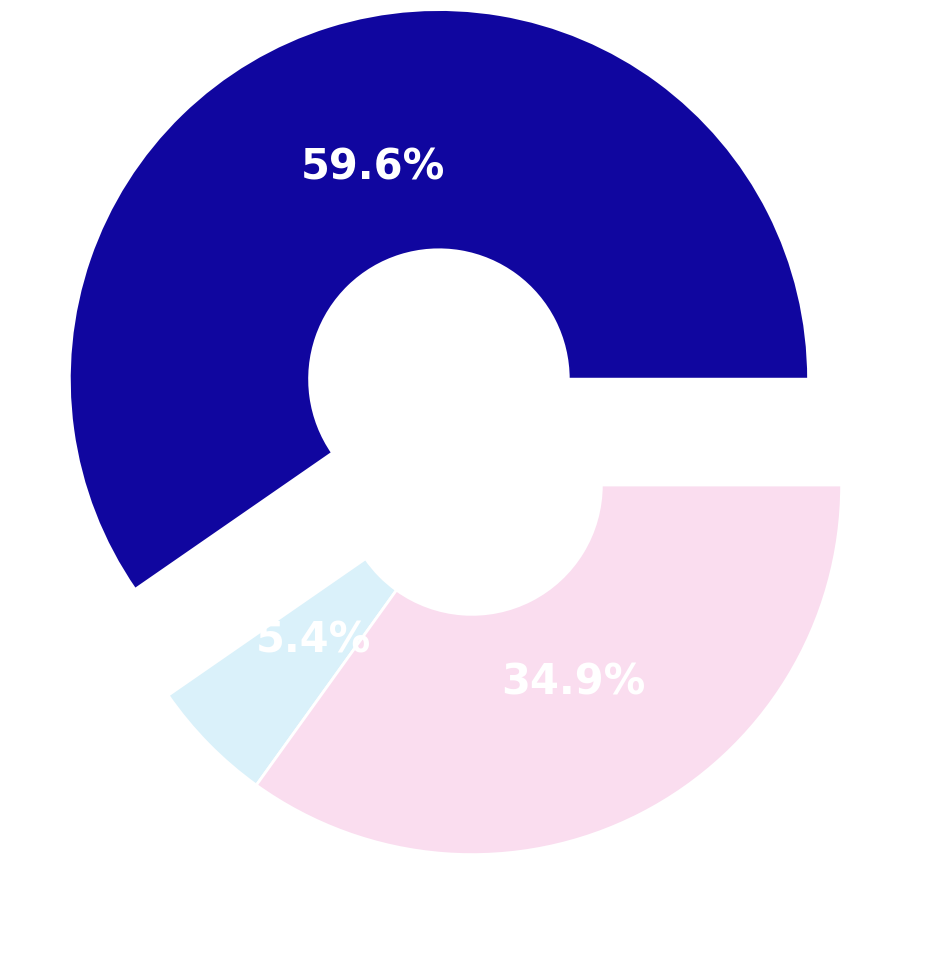

In [79]:
cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F'])) &
    (cabin_data['Sector'].isin(['DE Breakdown', 'TF Breakdown', 'Supply Chain Breakdown']))
].groupby('Sector')['BREAKDOWN_DURATION_HRS'].sum().plot.pie(
    autopct='%1.1f%%', 
    figsize=(12,12), 
    # legend=True, 
    labels=None, 
    # title='NXT1980FI & NXT1980F',
    colors=['#10069F','#00A3E025','#DF199525'], 
    explode = [0.3, 0, 0], #exolode first slice
    textprops = {
        'color': 'white',
        'fontweight': 'bold',
        'fontsize': 30}, 
    wedgeprops = {
        'linewidth':2,
        'edgecolor': 'white',
        'width':0.65
        }).set_ylabel('')

#### NXT2050

Text(0, 0.5, '')

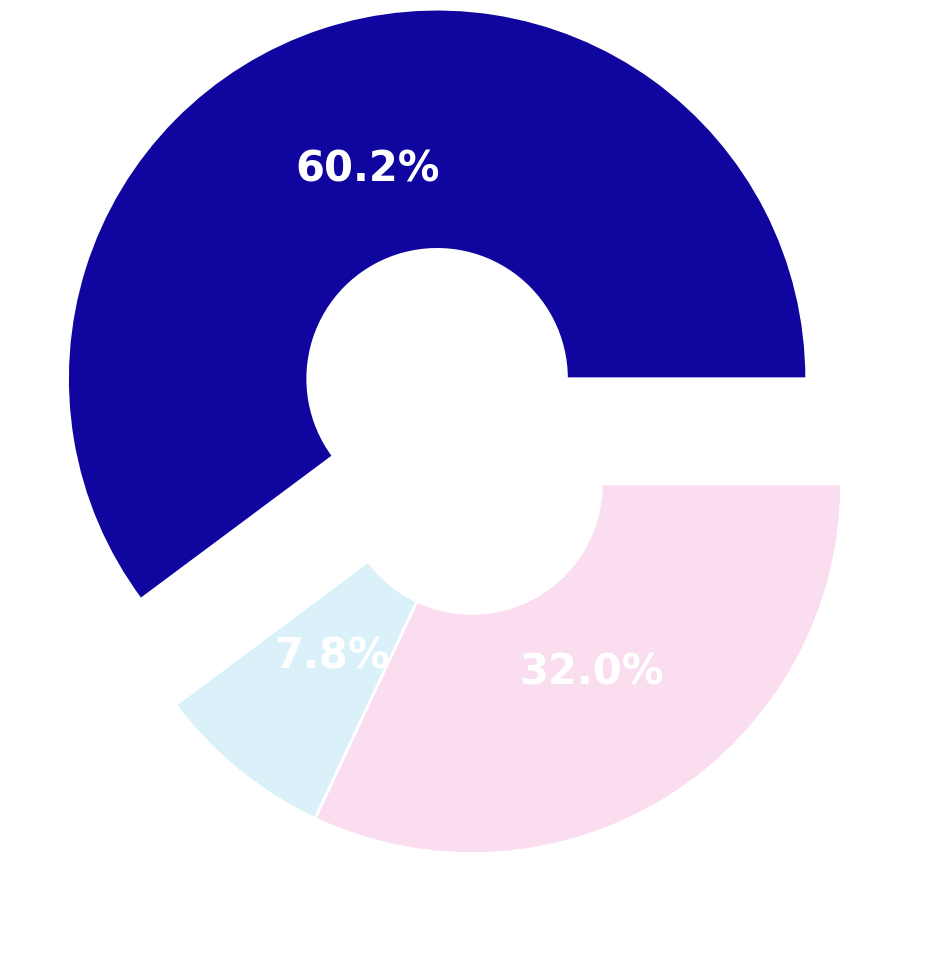

In [80]:
cabin_data.loc[
    (cabin_data['MACHINE_TYPE']=='NXT:2050') &
    (cabin_data['Sector'].isin(['DE Breakdown', 'TF Breakdown', 'Supply Chain Breakdown']))
].groupby('Sector')['BREAKDOWN_DURATION_HRS'].sum().plot.pie(
    autopct='%1.1f%%', 
    figsize=(12,12), 
    # legend=True, 
    labels=None, 
    # title='NXT1980FI & NXT1980F',
    colors=['#10069F','#00A3E025','#DF199525'], 
    explode = [0.3, 0, 0], #exolode first slice 
    textprops = {
        'color': 'white',
        'fontweight': 'bold',
        'fontsize': 30}, 
    wedgeprops = {
        'linewidth':2,
        'edgecolor': 'white',
        'width':0.65
        }).set_ylabel('')

### Pie charts (including B2)

#### NXT1980FI & NXT1980F

Text(0, 0.5, '')

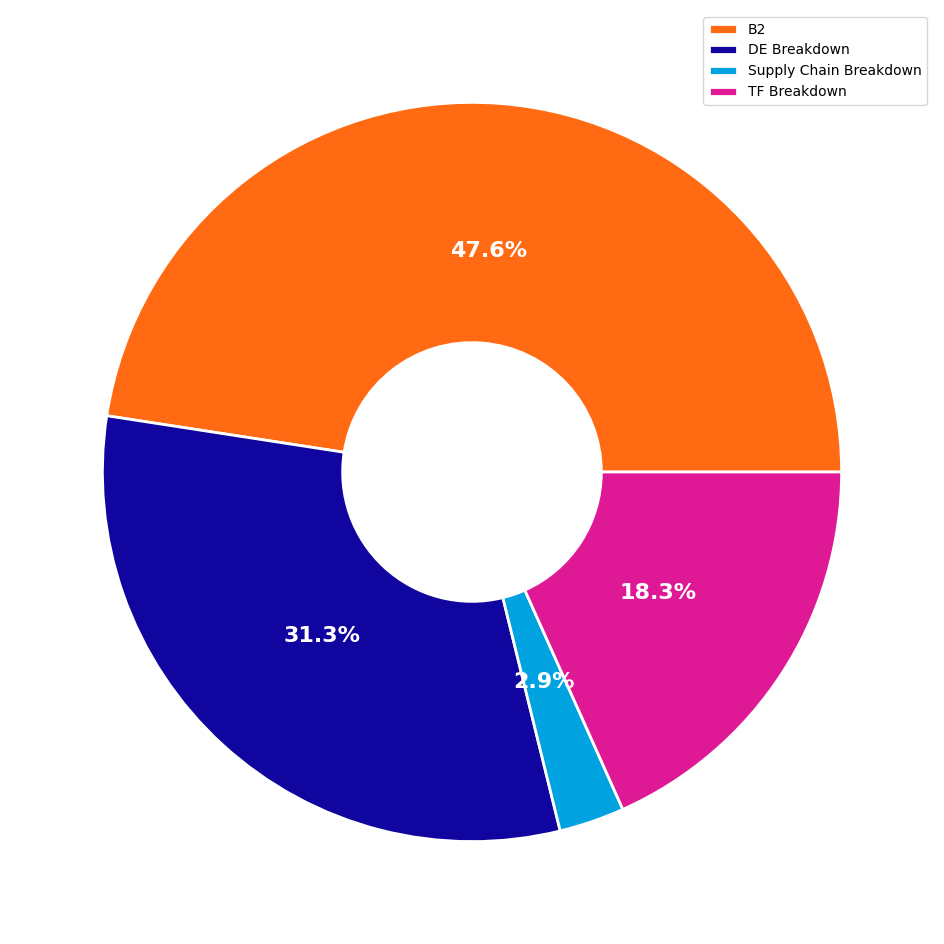

In [81]:
cabin_data.loc[cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F'])
].groupby('Sector')['BREAKDOWN_DURATION_HRS'].sum().plot.pie(
    autopct='%1.1f%%', 
    figsize=(12,12), 
    legend=True, 
    labels=None, 
    # title='NXT1980FI & NXT1980F',
    colors=['#FF6A13','#10069F','#00A3E0','#DF1995'], 
    textprops = {
        'color': 'white',
        'fontweight': 'bold',
        'fontsize': 16}, 
    wedgeprops = {
        'linewidth':2,
        'edgecolor': 'white',
        'width':0.65
        }).set_ylabel('')

#### NXT2050

Text(0, 0.5, '')

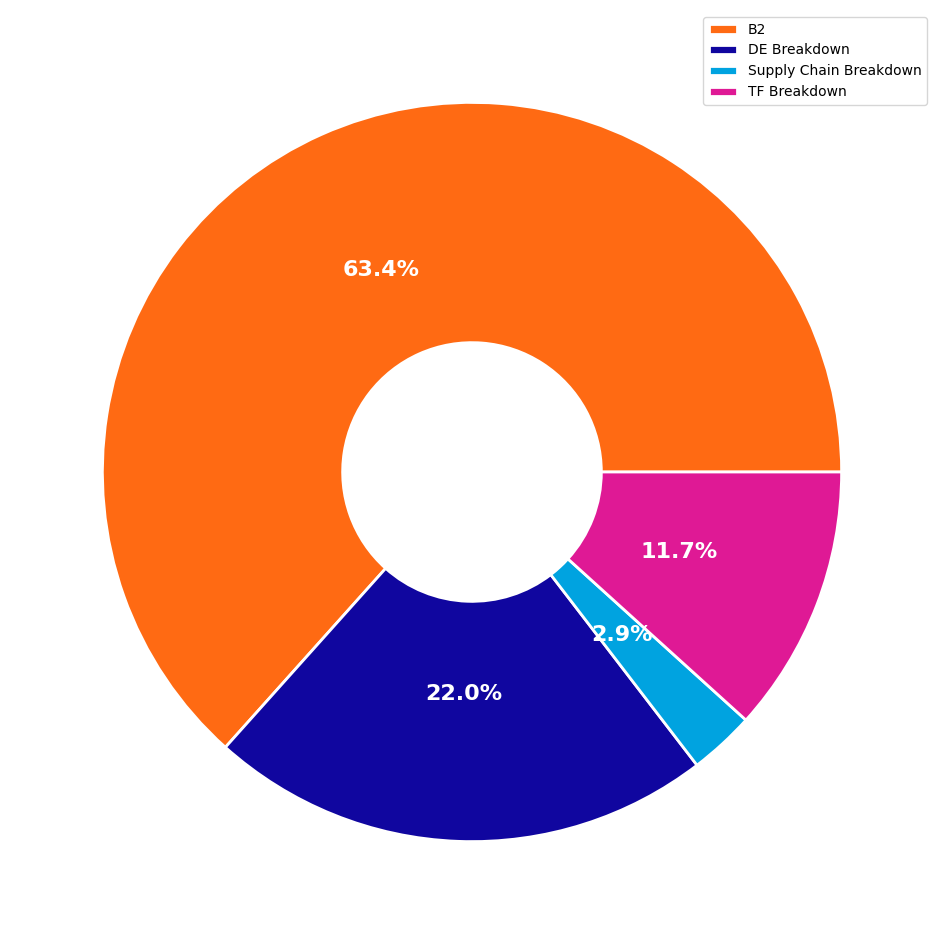

In [82]:
cabin_data.loc[cabin_data['MACHINE_TYPE']=='NXT:2050'
].groupby('Sector')['BREAKDOWN_DURATION_HRS'].sum().plot.pie(
    autopct='%1.1f%%', 
    figsize=(12,12), 
    legend=True, 
    labels=None, 
    # title = 'NXT2050',
    colors=['#FF6A13','#10069F','#00A3E0','#DF1995'], 
    textprops = {
        'color': 'white',
        'fontweight': 'bold',
        'fontsize': 16}, 
    wedgeprops = {
        'linewidth':2,
        'edgecolor': 'white',
        'width':0.65
        }).set_ylabel('')

## Bar charts

#### NXT1980FI & NXT1980F (Open/On Hold AIR vs No AIR)

<Axes: ylabel='Breakdown Hours'>

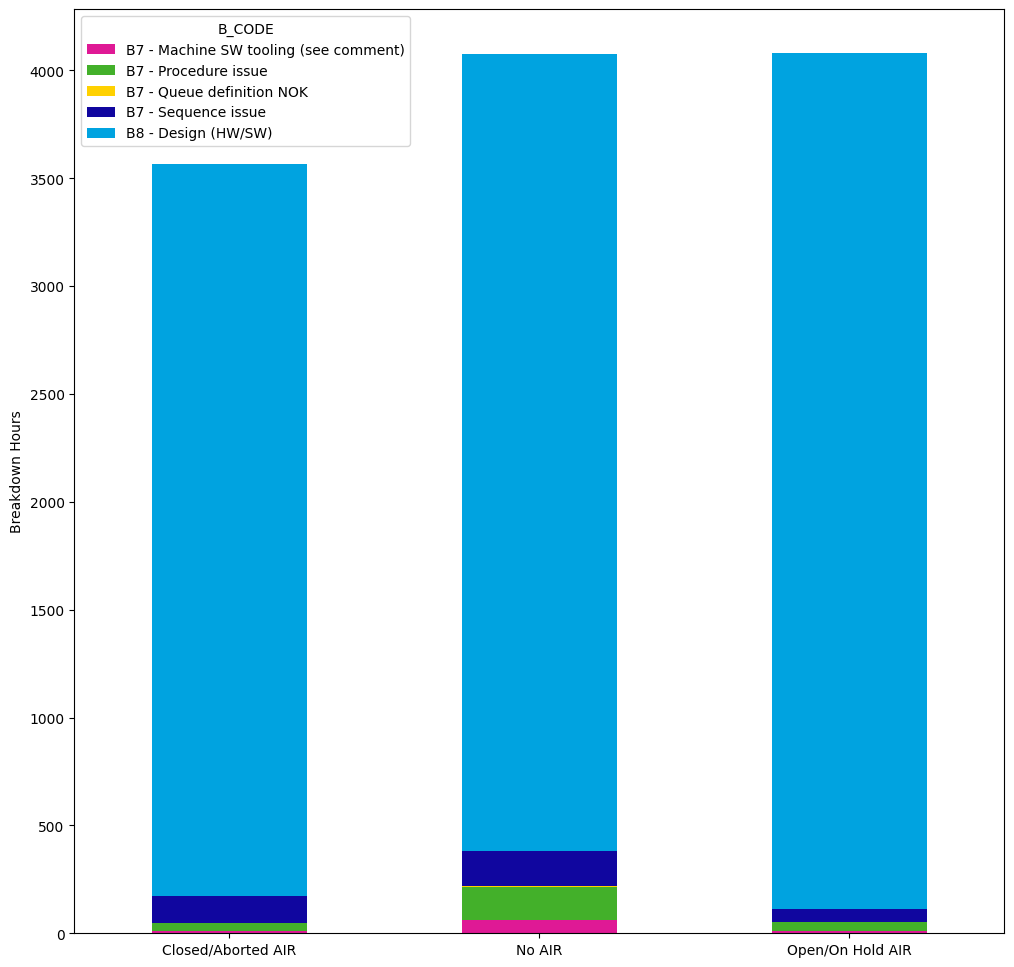

In [83]:
cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F'])) &
    (cabin_data['Sector'] == 'DE Breakdown')
].pivot_table(
    index='AIR_bucket',
    columns='B_CODE',
    values='BREAKDOWN_DURATION_HRS',
    aggfunc='sum'
).plot.bar(
    stacked=True,
    figsize=(12,12),
    color=['#DF1995','#43B02A','#FFD100','#10069F','#00A3E0'],
    rot=0,
    ylabel = 'Breakdown Hours',
    xlabel = ''
)

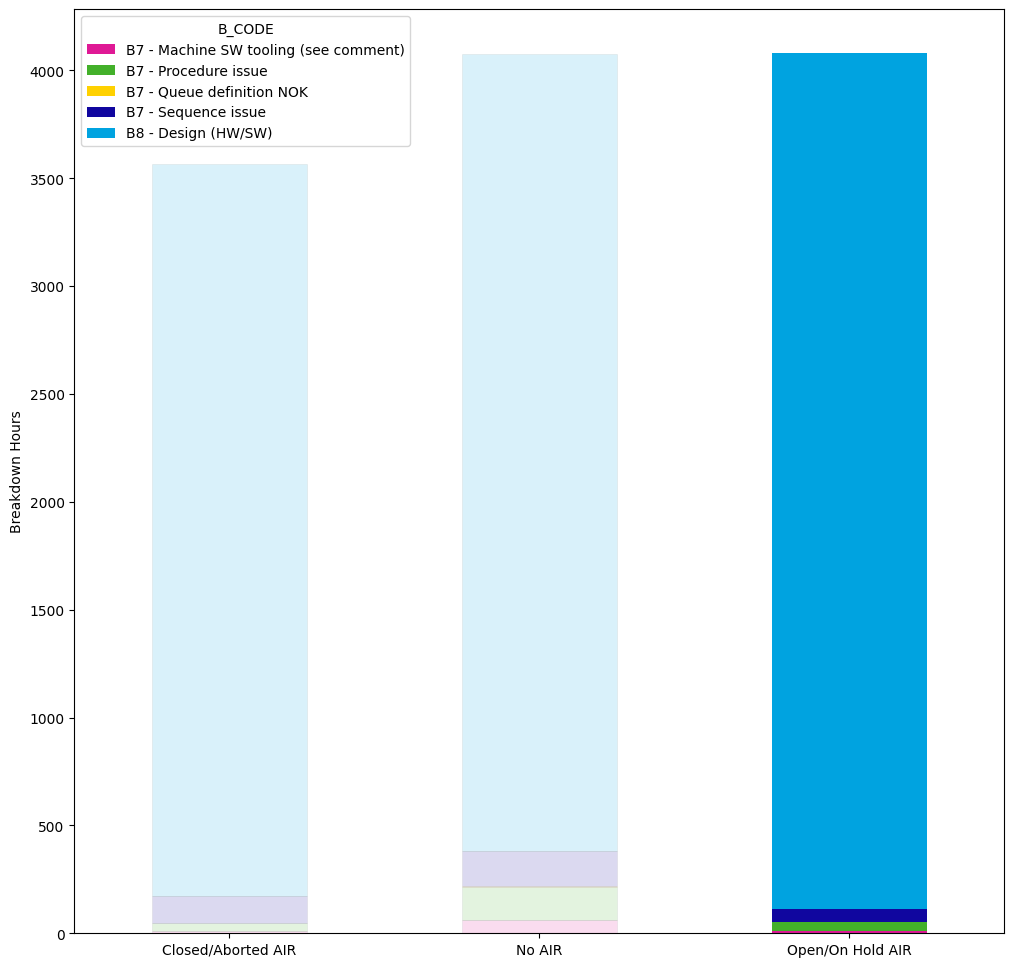

In [ ]:
import matplotlib.pyplot as plt

# --- Your original code ---
pt = cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F'])) &
    (cabin_data['Sector'] == 'DE Breakdown')
].pivot_table(
    index='AIR_bucket',
    columns='B_CODE',
    values='BREAKDOWN_DURATION_HRS',
    aggfunc='sum'
)

ax = pt.plot.bar(
    stacked=True,
    figsize=(12,12),
    color=['#DF1995','#43B02A','#FFD100','#10069F','#00A3E0'],
    rot=0,
    ylabel='Breakdown Hours',
    xlabel='',
    fontsize = 20
)

# --- Identify AIR bar position ---
air_index = 'Open/On Hold AIR'                  # adjust if casing differs
air_ix = list(pt.index).index(air_index)

# --- Highlight AIR bar; fade No AIR ---
for container in ax.containers:        # each stacked series
    for i, rect in enumerate(container):
        
        if i == air_ix:
            # === Highlight AIR ===
            rect.set_alpha(1.0)             # full opacity
            rect.set_linewidth(3)           # bold outline
              # makes it "pop"
        else:
            # === Fade all non-AIR bars ===
            rect.set_alpha(0.15)            # fade
            rect.set_linewidth(0.5)
            rect.set_edgecolor('gray')

plt.show()

#### NXT1980FI & NXT1980F (Open/On Hold AIR per SF)

Text(0, 0.5, 'Breakdown Hours')

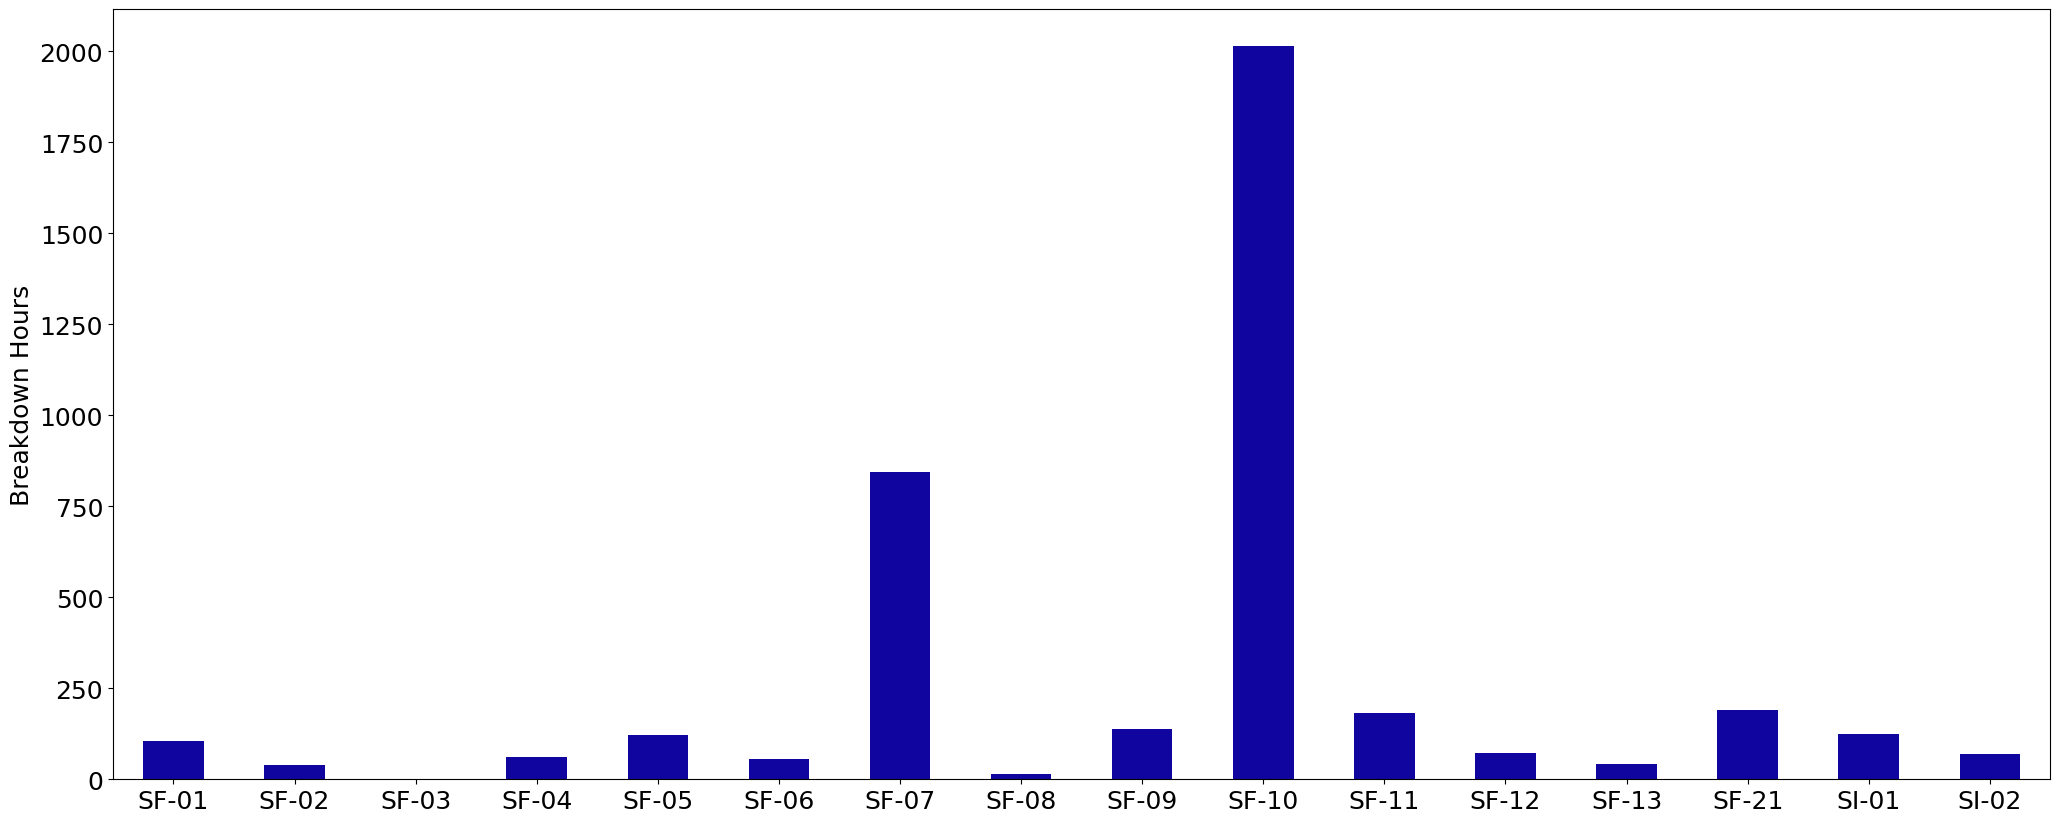

In [87]:
cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT1980FI','NXT1980F'])) &
    (cabin_data['Sector'] == 'DE Breakdown') & 
    (cabin_data['AIR_bucket'] == 'Open/On Hold AIR')
].groupby('SF')['BREAKDOWN_DURATION_HRS'].sum().plot.bar(
    stacked=True,
    figsize=(25,10),
    color=[
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        # '#10069F25',
        '#10069F'
           ],
    rot=0,
    xlabel = '',
    fontsize=18
).set_ylabel('Breakdown Hours', fontsize=18)

#### NXT2050 (Open/On Hold AIR vs No AIR)

<Axes: ylabel='Breakdown Hours'>

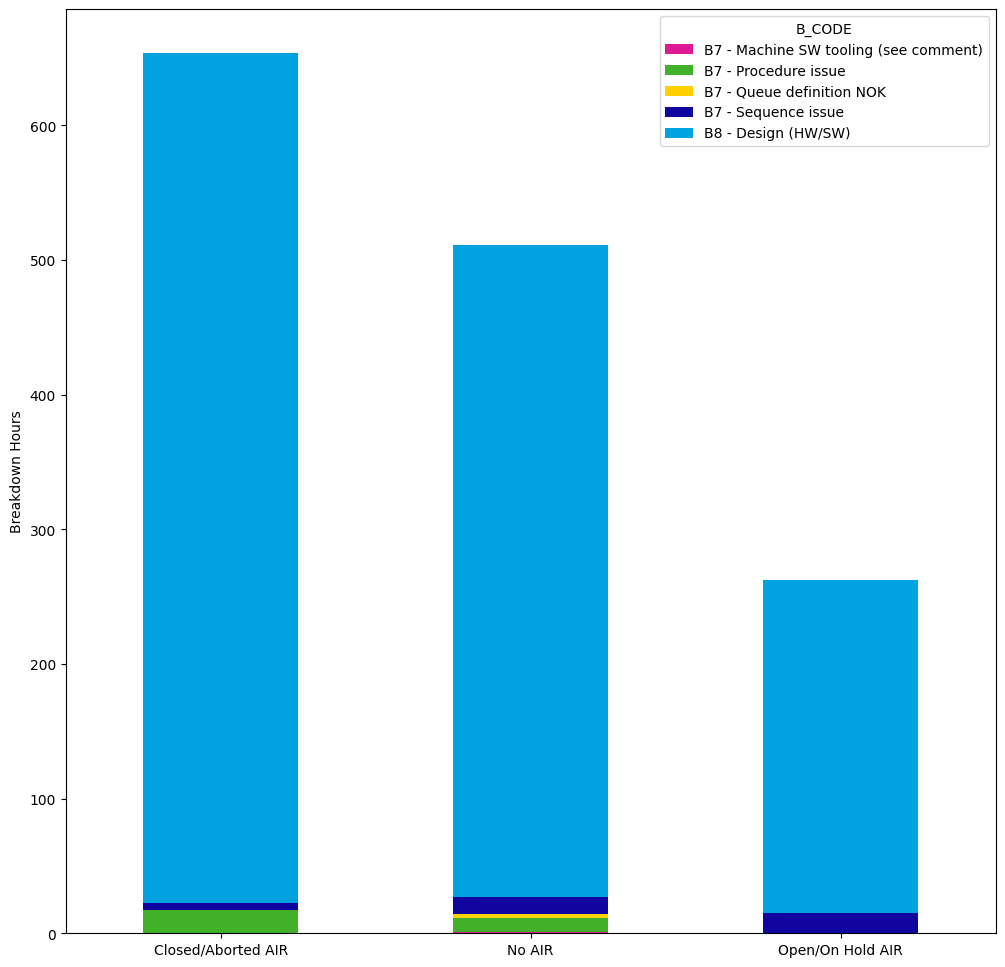

In [85]:
cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT:2050'])) &
    (cabin_data['Sector'] == 'DE Breakdown')
].pivot_table(
    index='AIR_bucket',
    columns='B_CODE',
    values='BREAKDOWN_DURATION_HRS',
    aggfunc='sum'
).plot.bar(
    stacked=True,
    figsize=(12,12),
    color=['#DF1995','#43B02A','#FFD100','#10069F','#00A3E0'],
    rot=0,
    ylabel = 'Breakdown Hours',
    xlabel = ''
)

#### NXT2050 (Open/On Hold AIR per SF)

Text(0, 0.5, 'Breakdown Hours')

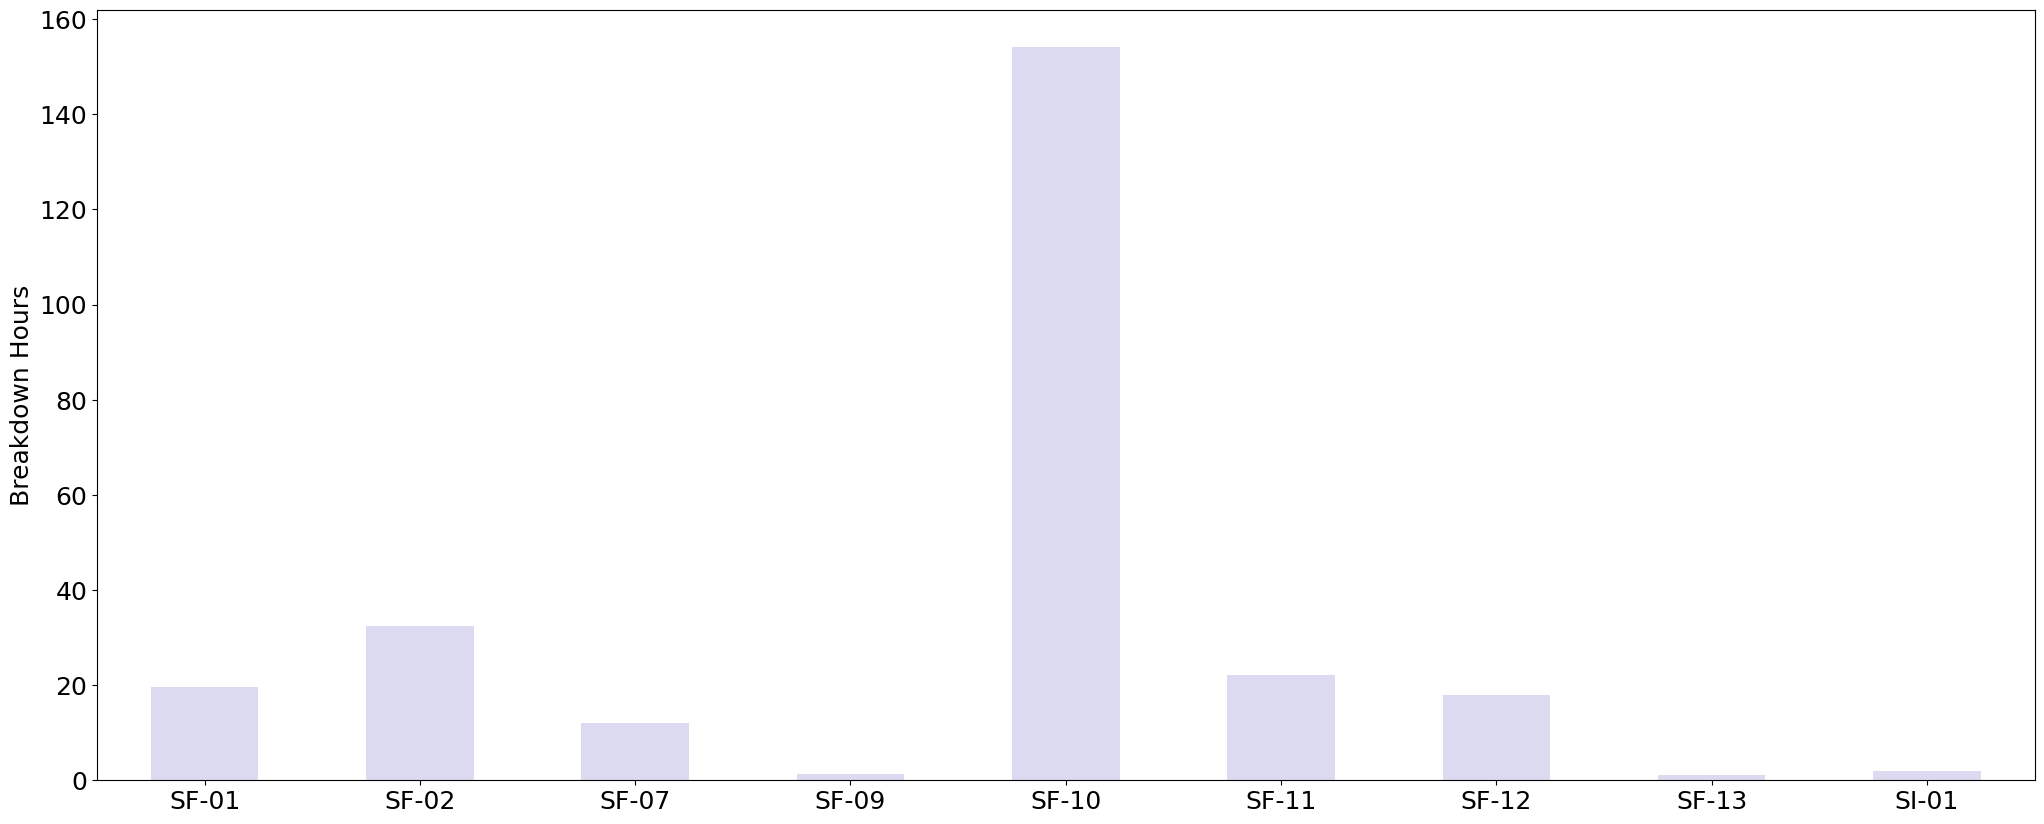

In [86]:
cabin_data.loc[
    (cabin_data['MACHINE_TYPE'].isin(['NXT:2050'])) &
    (cabin_data['Sector'] == 'DE Breakdown') & 
    (cabin_data['AIR_bucket'] == 'Open/On Hold AIR')
].groupby('SF')['BREAKDOWN_DURATION_HRS'].sum().plot.bar(
    stacked=True,
    figsize=(25,10),
    color=[
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F25',
        '#10069F',
           ],
    rot=0,
    xlabel = '',
    fontsize=18
).set_ylabel('Breakdown Hours', fontsize=18)